In [4]:
from scipy.special import digamma
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
simul_data= np.concatenate([np.random.normal(loc=1.0, scale=2.0, size=30),np.random.normal(loc=0.0, scale=2.0, size=70)])

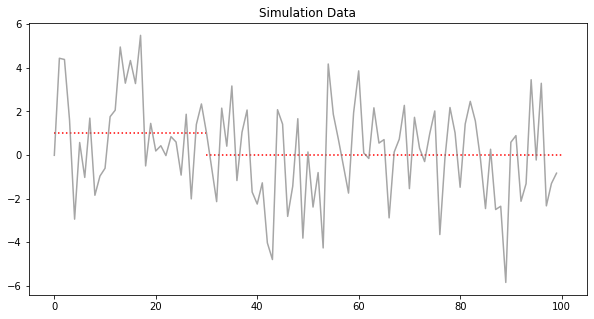

In [78]:
plt.figure(figsize = (10,5))
plt.title('Simulation Data')
plt.hlines(1,xmin = 0, xmax = 30,color='red',linestyles='dotted')
plt.hlines(0,xmin = 30, xmax = 100,color='red',linestyles='dotted')
plt.plot(simul_data,color= 'gray',alpha = 0.7)
plt.show()

In [36]:
#data import
beta = simul_data
T = len(beta)

# prior setting
b1,b2,c1,c2,d1,d2 = [1,1,1,1,1,1]

# inital value setting
expected_k,gamma1,eta1,gamma2,eta2 = [1,1,1,1,1]

In [37]:

m1     = (expected_k * (gamma1/eta1) + b1)**(-1)*(gamma1/eta1)*beta[:int(round(expected_k))].sum()
s1     = (expected_k * (gamma1/eta1) + b1)**(-1)
# mu2
m2     = ((T-expected_k) * (gamma2/eta2) + b2)**(-1)*(gamma2/eta2)*beta[int(round(expected_k)):].sum()
s2     = ((T-expected_k) * (gamma2/eta2) + b2)**(-1)
#tau1
gamma1 = c1 + 0.5*expected_k
eta1   = d1 + 0.5*((beta**2 - 2*m1*beta)[:int(round(expected_k))].sum() +int(round(expected_k)) *(m1**2 + s1)) + d1
#tau2
gamma2 = c2 + 0.5*(T-expected_k)
eta2   = d2 + 0.5*((beta**2 - 2*m2*beta)[int(round(expected_k)):].sum() +(T-int(round(expected_k))) *(m2**2 + s2)) + d2
def H(k):
    out = np.repeat(0.,T)
    for k in range(T):
        out[k] = np.exp(0.5*(k+1)*((gamma2/eta2)*((beta[:k+1]**2).mean() - 2*m2*beta[:k+1].mean() + m2**2 +s2)-
              (gamma1/eta1)*((beta[:k+1]**2).mean() - 2*m1*beta[:k+1].mean() + m1**2 +s1))
              +((k+1)/2)*(-np.log(eta1)+digamma(gamma1) + np.log(eta2)-digamma(gamma2)))
    return out
pdf_k = H(np.arange(T))/H(np.arange(T)).sum()
expected_k = pdf_k.dot(np.arange(1,T+1))
print(expected_k)

294.25879684371944


In [38]:
m1     = (expected_k * (gamma1/eta1) + b1)**(-1)*(gamma1/eta1)*beta[:int(round(expected_k))].sum()
s1     = (expected_k * (gamma1/eta1) + b1)**(-1)

In [39]:
m1,s1

(2.962222875397599, 0.00859895275780626)

In [40]:
m2     = ((T-expected_k) * (gamma2/eta2) + b2)**(-1)*(gamma2/eta2)*beta[int(round(expected_k)):].sum()
s2     = ((T-expected_k) * (gamma2/eta2) + b2)**(-1)

In [42]:
gamma1 = c1 + 0.5*expected_k
eta1   = d1 + 0.5*((beta**2 - 2*m1*beta)[:int(round(expected_k))].sum() +int(round(expected_k)) *(m1**2 + s1)) + d1

In [43]:
gamma1,eta1

(148.12939842185972, 181.28303728671654)

In [44]:
gamma2 = c2 + 0.5*(T-expected_k)
eta2   = d2 + 0.5*((beta**2 - 2*m2*beta)[int(round(expected_k)):].sum() +(T-int(round(expected_k))) *(m2**2 + s2)) + d2

In [86]:
k[0.5]

NameError: name 'k' is not defined

In [35]:

def H(k):
    out = np.repeat(0.,T)
    for k in range(T):
        out[k] = np.exp(0.5*(k+1)*((gamma2/eta2)*((beta[:k+1]**2).mean() - 2*m2*beta[:k+1].mean() + m2**2 +s2)-
              (gamma1/eta1)*((beta[:k+1]**2).mean() - 2*m1*beta[:k+1].mean() + m1**2 +s1))
              +((k+1)/2)*(-np.log(eta1)+digamma(gamma1) + np.log(eta2)-digamma(gamma2)))
    return out
pdf_k = H(np.arange(T))/H(np.arange(T)).sum()

print(expected_k)

nan


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [79]:
# prior b1 ,b2, c1, c2, d1, d2
def normal_change_point(data,prior,initval,n_iter = 100):
    
    
    #data import
    beta = data
    T = len(beta)
    
    # prior setting
    b1,b2,c1,c2,d1,d2 = prior['b1'],prior['b2'],prior['c1'],prior['c2'],prior['d1'],prior['d2']
    
    # inital value setting
    expected_k,gamma1,eta1,gamma2,eta2 = initval['expected_k'],initval['gamma1'],initval['eta1'],initval['gamma2'],initval['eta2'] 
    for num_iter in range(n_iter):
        # mu1
        m1     = (expected_k * (gamma1/eta1) + b1)**(-1)*(gamma1/eta1)*beta[:int(round(expected_k))].sum()
        s1     = (expected_k * (gamma1/eta1) + b1)**(-1)
        # mu2
        m2     = ((T-expected_k) * (gamma2/eta2) + b2)**(-1)*(gamma2/eta2)*beta[int(round(expected_k)):].sum()
        s2     = ((T-expected_k) * (gamma2/eta2) + b2)**(-1)
        #tau1
        gamma1 = c1 + 0.5*expected_k
        eta1   = d1 + 0.5*((beta**2 - 2*m1*beta)[:int(round(expected_k))].sum() +int(round(expected_k)) *(m1**2 + s1)) + d1
        #tau2
        gamma2 = c2 + 0.5*(T-expected_k)
        eta2   = d2 + 0.5*((beta**2 - 2*m2*beta)[int(round(expected_k)):].sum() +(T-int(round(expected_k))) *(m2**2 + s2)) + d2
        def H(k):
            out = np.repeat(0.,T)
            for k in range(T):
                out[k] = np.exp(0.5*(k+1)*((gamma2/eta2)*((beta[:k+1]**2).mean() - 2*m2*beta[:k+1].mean() + m2**2 +s2)-
                      (gamma1/eta1)*((beta[:k+1]**2).mean() - 2*m1*beta[:k+1].mean() + m1**2 +s1))
                      +((k+1)/2)*(-np.log(eta1)+digamma(gamma1) + np.log(eta2)-digamma(gamma2)))
            return out
        pdf_k = H(np.arange(T))/H(np.arange(T)).sum()
        expected_k = pdf_k.dot(np.arange(1,T+1))
        print(expected_k)
    out = dict({'m1':m1,'sigma1':s1,'m2':m2,'sigma2':s2,'gamma1':gamma1,'eta1':eta1,'gamma2':gamma2,'eta2':eta2,'k_proba' : pdf_k,'expected_k':expected_k})
    return(out)

In [83]:
prior = {'b1':1,'b2':1,
        'c1':1,'c2':1,
        'd1':1,'d2':1}
initval = {'expected_k' : 30 ,
          'gamma1' : 1, 'gamma2' :1,
          'eta1' : 1, 'eta2' : 1}

In [84]:
result = normal_change_point(simul_data,prior,initval)

28.795467173176164
28.75503782658252
28.721600952079164
28.695510220137415
28.675235287224844
28.65945989940372
28.64717150912457
28.637590836591976
28.63011607934285
28.62428120204025
28.619724524449094
28.616164879073906
28.61338339964976
28.61120954063688
28.609510301994277
28.60818189824426
28.607143301391808
28.606331226458153
28.605696231358436
28.60519967983822
28.60481137425115
28.604507709075474
28.604270229783957
28.604084507569524
28.6039392603883
28.60382566621122
28.60373682633518
28.60366734589386
28.603613005930136
28.60357050701907
28.603537268812982
28.603511273300796
28.603490942242445
28.603475041323506
28.603462605202093
28.603452878893023
28.603445271926887
28.603439322499963
28.60343466943658
28.603431030261532
28.603428184050905
28.603425958019837
28.60342421703308
28.603422855401014
28.603421790463536
28.603420957571906
28.603420306164168
28.603419796695665
28.603419398238415
28.603419086603424
28.603418842872458
28.603418652249502
28.603418503162565
28.60341838

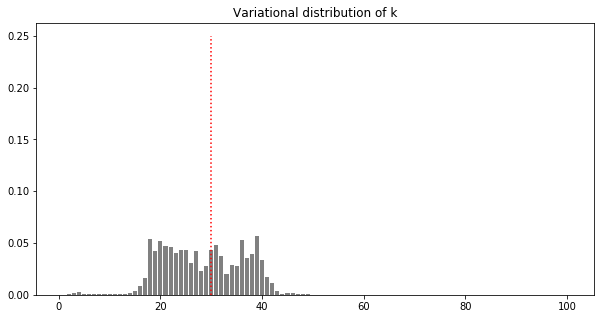

In [85]:
plt.figure(figsize = (10,5))
plt.title('Variational distribution of k')
plt.bar(range(1,1+len(result['k_proba'])),result['k_proba'], color = 'gray')
plt.vlines(30, ymin = 0, ymax = 0.25 , color = 'red', linestyles='dotted')
plt.show()

In [17]:
result

{'m1': 0.2467671106190221,
 'sigma1': 0.14758319371230907,
 'm2': 0.35035791660780774,
 'sigma2': 0.0010983950862824571,
 'gamma1': 3.8490932867758767,
 'eta1': 3.7973445330246394,
 'gamma2': 498.1509067132241,
 'eta2': 544.6468887770203,
 'k_proba': array([1.50040566e-01, 1.42006803e-01, 1.05504761e-01, 9.98863023e-02,
        9.40423123e-02, 8.95372232e-02, 7.31199109e-02, 6.61131190e-02,
        3.97177623e-02, 2.46213419e-02, 1.84973340e-02, 1.68671161e-02,
        1.17345217e-02, 1.09665463e-02, 8.46931703e-03, 7.64413305e-03,
        6.85712530e-03, 6.48130823e-03, 3.54743861e-03, 2.91898515e-03,
        2.71676883e-03, 2.49200549e-03, 2.28402276e-03, 2.09196346e-03,
        2.01011505e-03, 1.27184774e-03, 1.19834259e-03, 1.13597152e-03,
        1.04126858e-03, 8.63452861e-04, 6.70684943e-04, 5.59818464e-04,
        4.92788293e-04, 3.56787980e-04, 3.12423361e-04, 2.95583614e-04,
        2.31840388e-04, 1.99173555e-04, 1.65087583e-04, 1.51804825e-04,
        1.28727857e-04, 1.1529